In [4]:
!pip install torch torchvision wandb
!wandb login

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: jwkim628 (jwkim628-hanyang-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


In [8]:
import wandb

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

In [6]:
config = {
    "epochs" : 5,
    "batch_size" : 64,
    "learning_rate" : 0.001,
    "architetcure" : "SimpleCNN",
    "dataset" : "MNIST"
}

In [9]:
wandb.init(project="minst-pratice-ds",config = config)

/usr/local/lib/python3.12/dist-packages/notebook/notebookapp.py:191: SyntaxWarning: invalid escape sequence '\/'
  | |_| | '_ \/ _` / _` |  _/ -_)
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: jwkim628 (jwkim628-hanyang-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


#데이터 전처리

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,),(0.3081,))
])

In [3]:
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

100%|██████████| 9.91M/9.91M [00:00<00:00, 20.0MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 477kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.51MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 8.56MB/s]


In [10]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=config['batch_size'], shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size = config['batch_size'], shuffle=False)

In [14]:
class SimpleCNN(nn.Module):
  def __init__(self):
    super(SimpleCNN, self).__init__()

    self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding = 1)
    self.relu1 = nn.ReLU()
    self.pool1 = nn.MaxPool2d(kernel_size=2, stride = 2)

    self.conv2 = nn.Conv2d(in_channels=32, out_channels = 64, kernel_size = 3, padding =1 )
    self.relu2 = nn.ReLU()
    self.pool2 = nn.MaxPool2d(kernel_size = 2, stride = 2)

    self.fc1 = nn.Linear(64*7*7,128)
    self.relu3 = nn.ReLU()
    self.fc2 = nn.Linear(128,10)

  def forward(self,x):
    x = self.conv1(x)
    x = self.relu1(x)
    x = self.pool1(x)

    x = self.conv2(x)
    x = self.relu2(x)
    x = self.pool2(x)

    x = x.view(x.size(0), -1)

    x = self.fc1(x)
    x = self.relu3(x)
    x = self.fc2(x)

    return x

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = SimpleCNN().to(device)

In [12]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = config['learning_rate'])

wandb.watch(model, log="all", log_freq = 100)

In [15]:
total_step = len(train_loader)

for epoch in range(config['epochs']):
  for i , (images, labels) in enumerate(train_loader):
    images = images.to(device)
    labels = labels.to(device)

    #순전파
    outputs = model(images)
    loss = criterion(outputs, labels)
    #역전파
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i+1) % 100 == 0:

      _ , predicted = torch.max(outputs.data, 1)
      accuracy = (predicted == labels).sum().item() / labels.size(0)

      print(f'Epoch [{epoch+1}/{config["epochs"]}], Step [{i+1}/{total_step}], Loss: {loss.item():.4f}, Acc: {accuracy:.4f}')

      wandb.log({
                "epoch": epoch + 1,
                "loss": loss.item(),
                "accuracy": accuracy,
                # 필요하다면 이미지도 로그 가능
                # "examples": [wandb.Image(images[0], caption=f"Pred: {predicted[0].item()}")]
            })

print("학습 완료!")
wandb.finish()


Epoch [1/5], Step [100/938], Loss: 2.2893, Acc: 0.1719
Epoch [1/5], Step [200/938], Loss: 2.3008, Acc: 0.0938
Epoch [1/5], Step [300/938], Loss: 2.3339, Acc: 0.0469
Epoch [1/5], Step [400/938], Loss: 2.3090, Acc: 0.0938
Epoch [1/5], Step [500/938], Loss: 2.3061, Acc: 0.0781
Epoch [1/5], Step [600/938], Loss: 2.3059, Acc: 0.1719
Epoch [1/5], Step [700/938], Loss: 2.2913, Acc: 0.1719
Epoch [1/5], Step [800/938], Loss: 2.3055, Acc: 0.0469
Epoch [1/5], Step [900/938], Loss: 2.3006, Acc: 0.0938
Epoch [2/5], Step [100/938], Loss: 2.3065, Acc: 0.0469
Epoch [2/5], Step [200/938], Loss: 2.3298, Acc: 0.0469
Epoch [2/5], Step [300/938], Loss: 2.3110, Acc: 0.0781
Epoch [2/5], Step [400/938], Loss: 2.3275, Acc: 0.0625
Epoch [2/5], Step [500/938], Loss: 2.2913, Acc: 0.0781
Epoch [2/5], Step [600/938], Loss: 2.3346, Acc: 0.0625
Epoch [2/5], Step [700/938], Loss: 2.2897, Acc: 0.0938
Epoch [2/5], Step [800/938], Loss: 2.2957, Acc: 0.1406
Epoch [2/5], Step [900/938], Loss: 2.3099, Acc: 0.0938
Epoch [3/5

accuracy,█▄▂▄▃██▂▂▂▃▃▃▃▄▆▆▄▇▆▆▄▄▃▄▃▆▅▅▃▃▁▃▂▅▃█▇▄▇
epoch,▁▁▁▁▁▁▁▁▃▃▃▃▃▃▃▃▅▅▅▅▅▅▅▅▆▆▆▆▆▆▆▆████████
loss,▂▃█▅▄▄▂▄▄▇▅▇▂█▂▃▂▆▁▅▃▃▆▅▃▃▄▅▅▄▅▆▄▅▄▇▄▂▅▂
accuracy,0.15625
epoch,5
loss,2.29006


In [18]:
class RobustCNN(nn.Module):
  def __init__(self):
    super(RobustCNN,self).__init__()

    self.layer1 = nn.Sequential(
        nn.Conv2d(1, 32, kernel_size=3, padding=1),
        nn.BatchNorm2d(32),
        nn.ReLU(),
        nn.Conv2d(32, 64, kernel_size = 3, padding =1),
        nn.BatchNorm2d(64),
        nn.ReLU(),
        nn.MaxPool2d(2,2)
    )

    self.layer2 = nn.Sequential(
        nn.Conv2d(64, 128, kernel_size = 3, padding = 1),
        nn.BatchNorm2d(128),
        nn.ReLU(),
        nn.MaxPool2d(2,2)
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(128*7*7,512),
        nn.BatchNorm1d(512),
        nn.ReLU(),
        nn.Dropout(0.5),
        nn.Linear(512,10)
    )

    self._initialize_weights()

  def forward(self, x):
    out = self.layer1(x)
    out = self.layer2(out) # Changed x to out here, as layer1 output should feed into layer2
    out = self.classifier(out)
    return out

  def _initialize_weights(self):
    for m in self.modules():
      if isinstance(m, nn.Conv2d):
        nn.init.kaiming_normal_(m.weight, mode = 'fan_out', nonlinearity='relu')
      elif isinstance(m, nn.BatchNorm2d):
        nn.init.constant_(m.weight, 1)
        nn.init.constant_(m.bias, 0)

In [22]:
wandb.init(project="minst-pratice-ds",config = config, reinit=True) # Re-initialize wandb for a new run

model = RobustCNN().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=config['learning_rate'])

wandb.watch(model, log = "all", log_freq = 100)

for epoch in range(config['epochs']):
  model.train()

  running_loss = 0.0
  correct_train = 0
  total_train = 0

  for i, (images, labels) in enumerate(train_loader):
    images, labels = images.to(device), labels.to(device)

    outputs = model(images)
    loss = criterion(outputs, labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
    _, predicted = torch.max(outputs.data, 1)
    total_train += labels.size(0)
    correct_train += (predicted == labels).sum().item()

    if (i + 1) % 100 == 0:
      wandb.log({
          "batch_train_loss" : loss.item(),
          "batch_train_acc" : correct_train / total_train
      })

  train_acc = 100 * correct_train / total_train
  avg_loss = running_loss / len(train_loader)

  model.eval()

  correct_test = 0
  total_test = 0

  with torch.no_grad():
    for images, labels in test_loader:
      images, labels = images.to(device), labels.to(device)
      outputs = model(images)
      _, predicted = torch.max(outputs.data, 1)

      total_test += labels.size(0)
      correct_test += (predicted == labels).sum().item()

  test_acc = 100 * correct_test / total_test

  print(f"Epoch [{epoch+1}/{config['epochs']}] "
          f"Train Loss: {avg_loss:.4f} | Train Acc: {train_acc:.2f}% | Test Acc: {test_acc:.2f}%")

  wandb.log({
        "epoch": epoch + 1,
        "train_loss": avg_loss,
        "train_accuracy": train_acc,
        "test_accuracy": test_acc  # Train과 Test 차이를 봐야 과적합 여부 판단 가능
    })

print("전체 학습 종료")
wandb.finish()

wandb: WARNING Using a boolean value for 'reinit' is deprecated. Use 'return_previous' or 'finish_previous' instead.


Epoch [1/5] Train Loss: 0.0870 | Train Acc: 97.42% | Test Acc: 98.88%
Epoch [2/5] Train Loss: 0.0391 | Train Acc: 98.78% | Test Acc: 99.07%
Epoch [3/5] Train Loss: 0.0312 | Train Acc: 99.00% | Test Acc: 99.18%
Epoch [4/5] Train Loss: 0.0233 | Train Acc: 99.22% | Test Acc: 99.39%
Epoch [5/5] Train Loss: 0.0227 | Train Acc: 99.30% | Test Acc: 99.21%
전체 학습 종료


batch_train_acc,▁▃▄▅▅▅▅▆▇▇▇▇▇▇▇▇██████▇▇████████████████
batch_train_loss,▇▇█▄▂▇▆▆▄▃▂▃▁▂▁▃▆▂▂▂▅▁█▃▂▁▁▃▃▁▂▂▁▁▅▂▁▁▁▁
epoch,▁▃▅▆█
test_accuracy,▁▄▅█▆
train_accuracy,▁▆▇██
train_loss,█▃▂▁▁
batch_train_acc,0.993
batch_train_loss,0.00223
epoch,5
test_accuracy,99.21
train_accuracy,99.29667


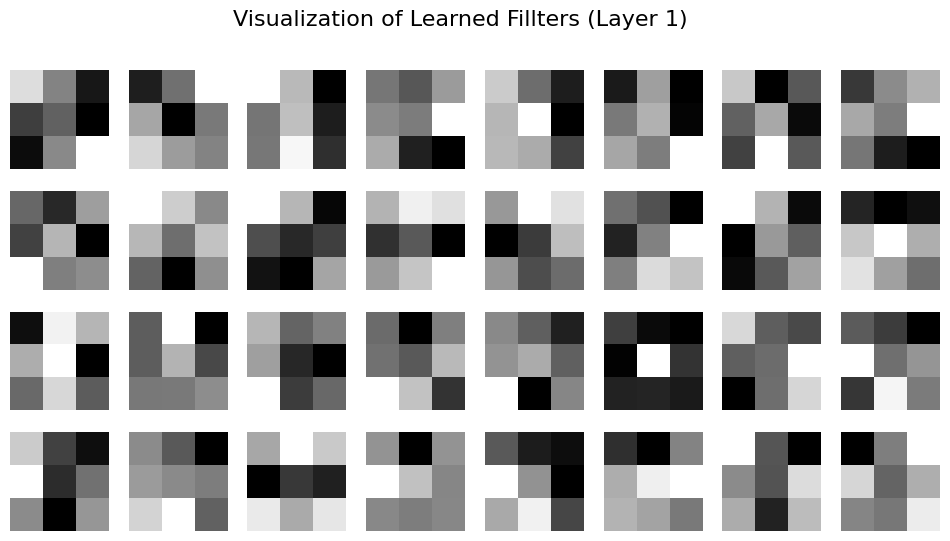

In [24]:
import matplotlib.pyplot as plt

kernels = model.layer1[0].weight.detach().cpu()

fig, axarr = plt.subplots(4, 8, figsize=(12,6))
for idx in range(32):
  row = idx // 8
  col = idx % 8
  axarr[row,col].imshow(kernels[idx][0],cmap='gray')
  axarr[row,col].axis('off')


plt.suptitle("Visualization of Learned Fillters (Layer 1)", fontsize = 16)
plt.show()

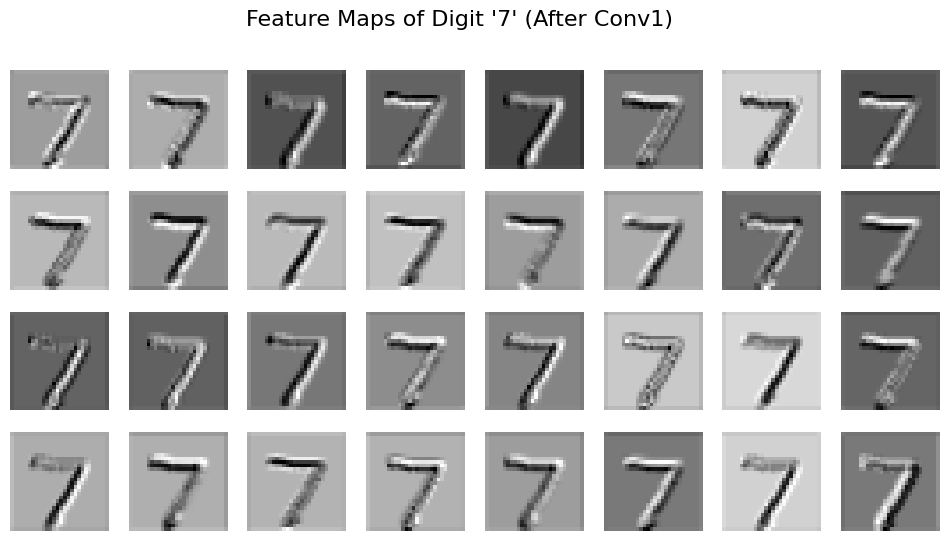

In [25]:
image, label = test_dataset[0]
image = image.unsqueeze(0).to(device)

feature_maps = model.layer1[0](image)


feature_maps = feature_maps.detach().cpu().squeeze(0)

fig, axarr = plt.subplots(4, 8, figsize=(12, 6))
for idx in range(32):
    row = idx // 8
    col = idx % 8
    axarr[row, col].imshow(feature_maps[idx], cmap='gray')
    axarr[row, col].axis('off')

plt.suptitle(f"Feature Maps of Digit '{label}' (After Conv1)", fontsize=16)
plt.show()